<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


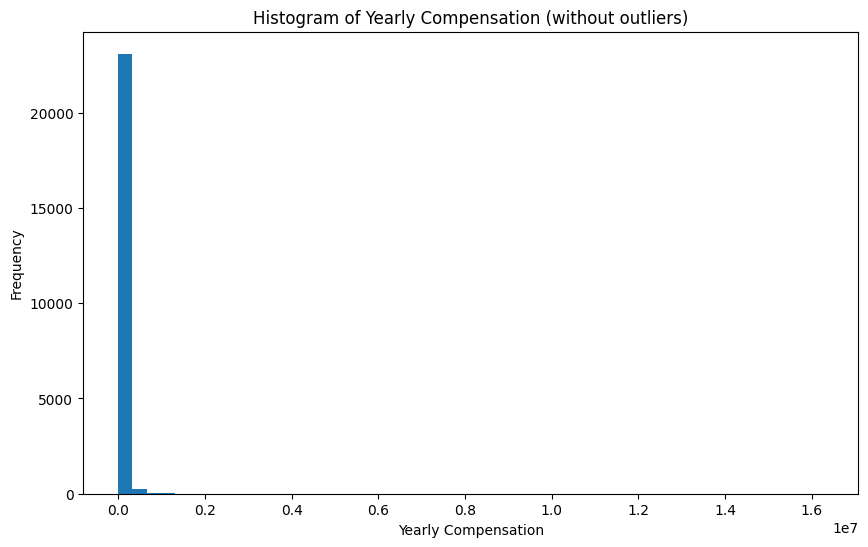

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedCompYearly'], bins=50)
plt.title('Histogram of Yearly Compensation (without outliers)')
plt.xlabel('Yearly Compensation')
plt.ylabel('Frequency')
plt.show()


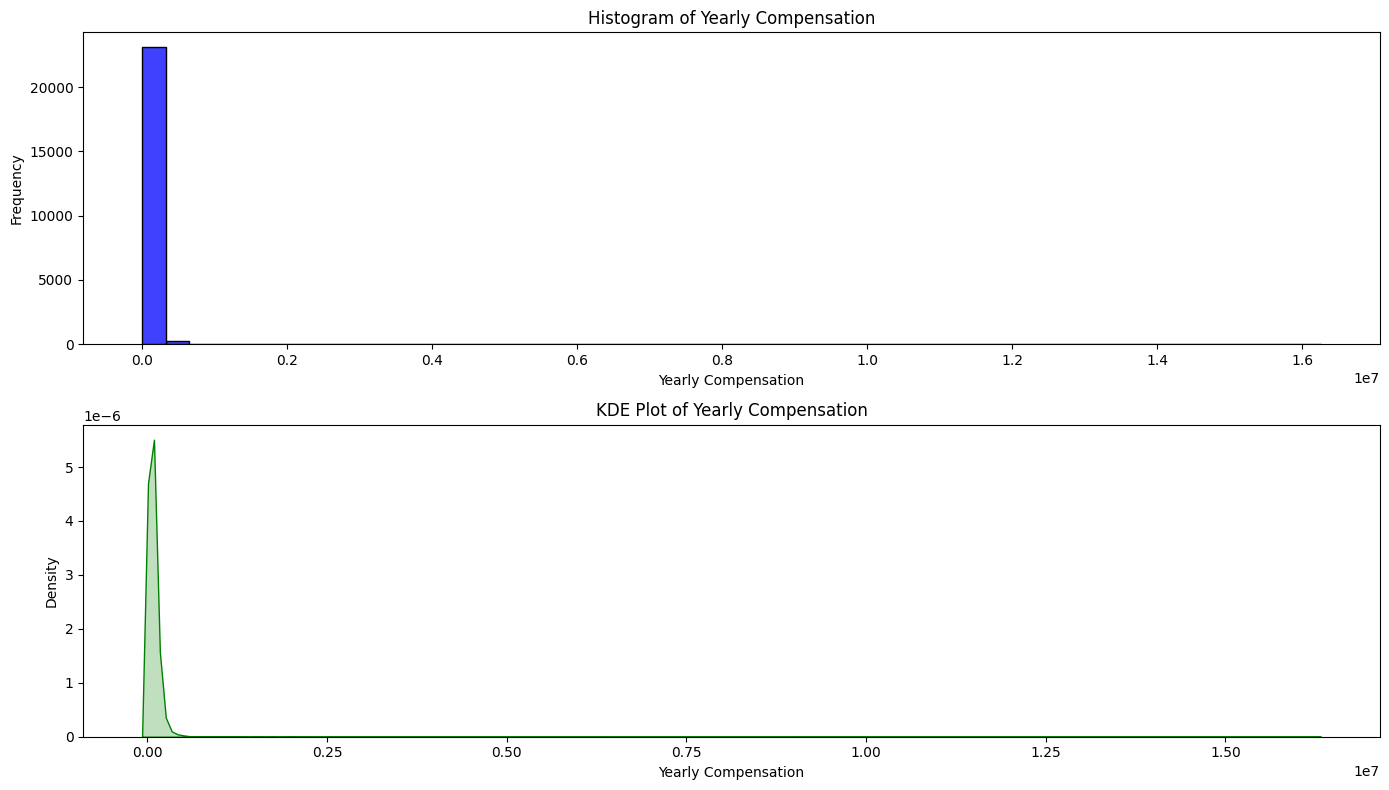

In [8]:
# Plot the distribution and histogram for ConvertedCompYearly
plt.figure(figsize=(14, 8))

# Histogram
plt.subplot(2, 1, 1)
sns.histplot(df['ConvertedCompYearly'], bins=50, kde=False, color='blue')
plt.xlabel('Yearly Compensation')
plt.ylabel('Frequency')
plt.title('Histogram of Yearly Compensation')

# KDE Plot
plt.subplot(2, 1, 2)
sns.kdeplot(df['ConvertedCompYearly'], fill=True, color='green')
plt.xlabel('Yearly Compensation')
plt.ylabel('Density')
plt.title('KDE Plot of Yearly Compensation')

plt.tight_layout()
plt.show()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [9]:
# Filter for full-time employees
full_time_employees = df[df['Employment'] == 'Employed, full-time']

# Calculate the median compensation for full-time employees
median_compensation_full_time = full_time_employees['ConvertedCompYearly'].median()

print(f"Median compensation for full-time employees: {median_compensation_full_time}")

Median compensation for full-time employees: 69814.0


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



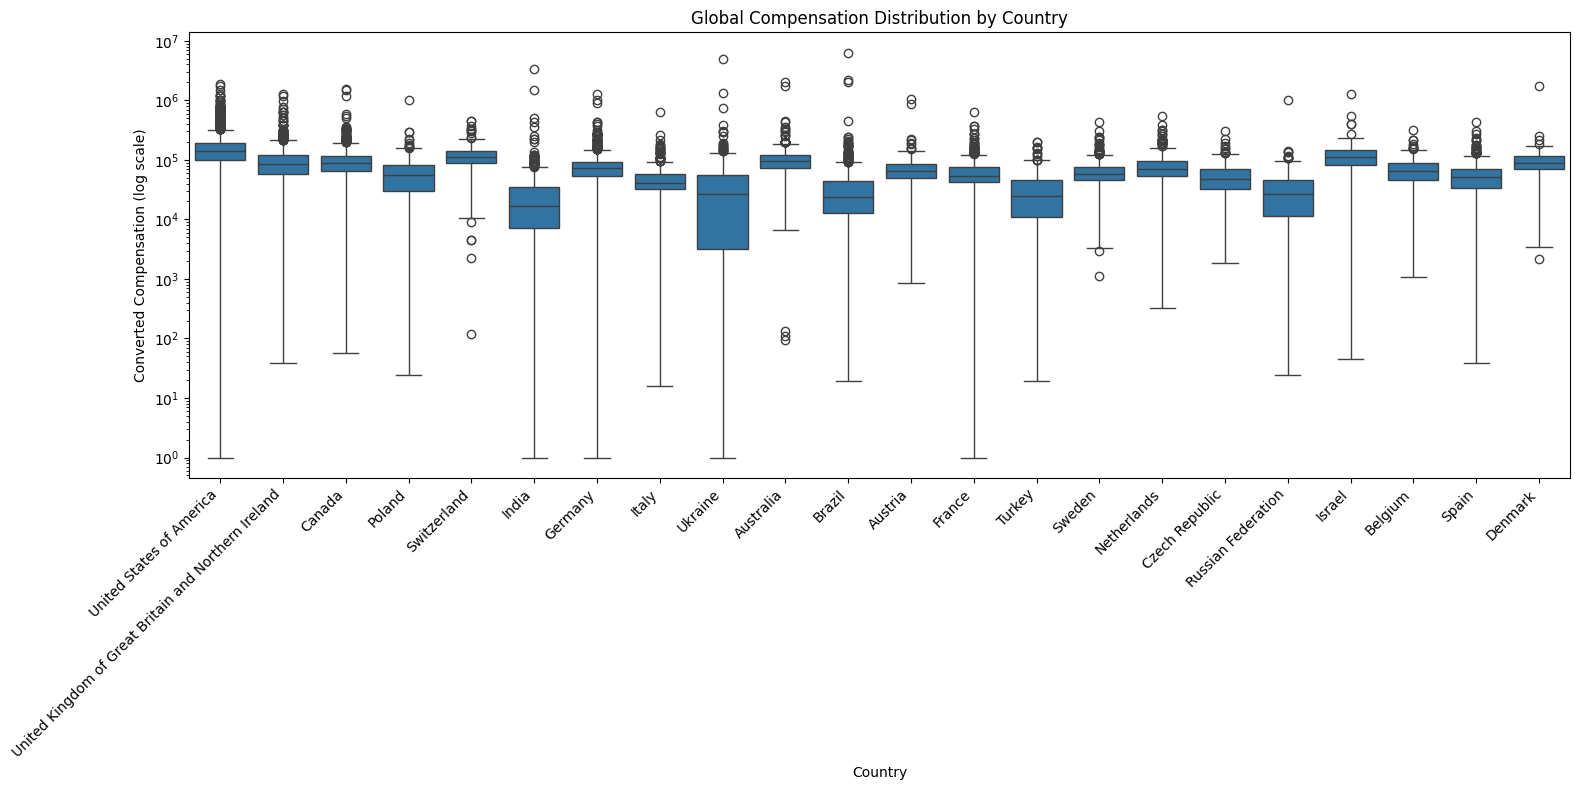

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: Filter for countries with enough data
top_countries = df['Country'].value_counts().loc[lambda x: x >500].index  # e.g., at least 50 records
filtered_df = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(16, 8))
sns.boxplot(
    data=filtered_df,
    x='Country',
    y='ConvertedCompYearly',
    showfliers=True  # hide extreme outliers to better view the boxes
)
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  # log scale helps with skewed compensation data
plt.ylabel('Converted Compensation (log scale)')
plt.title('Global Compensation Distribution by Country')

plt.tight_layout()
plt.show()

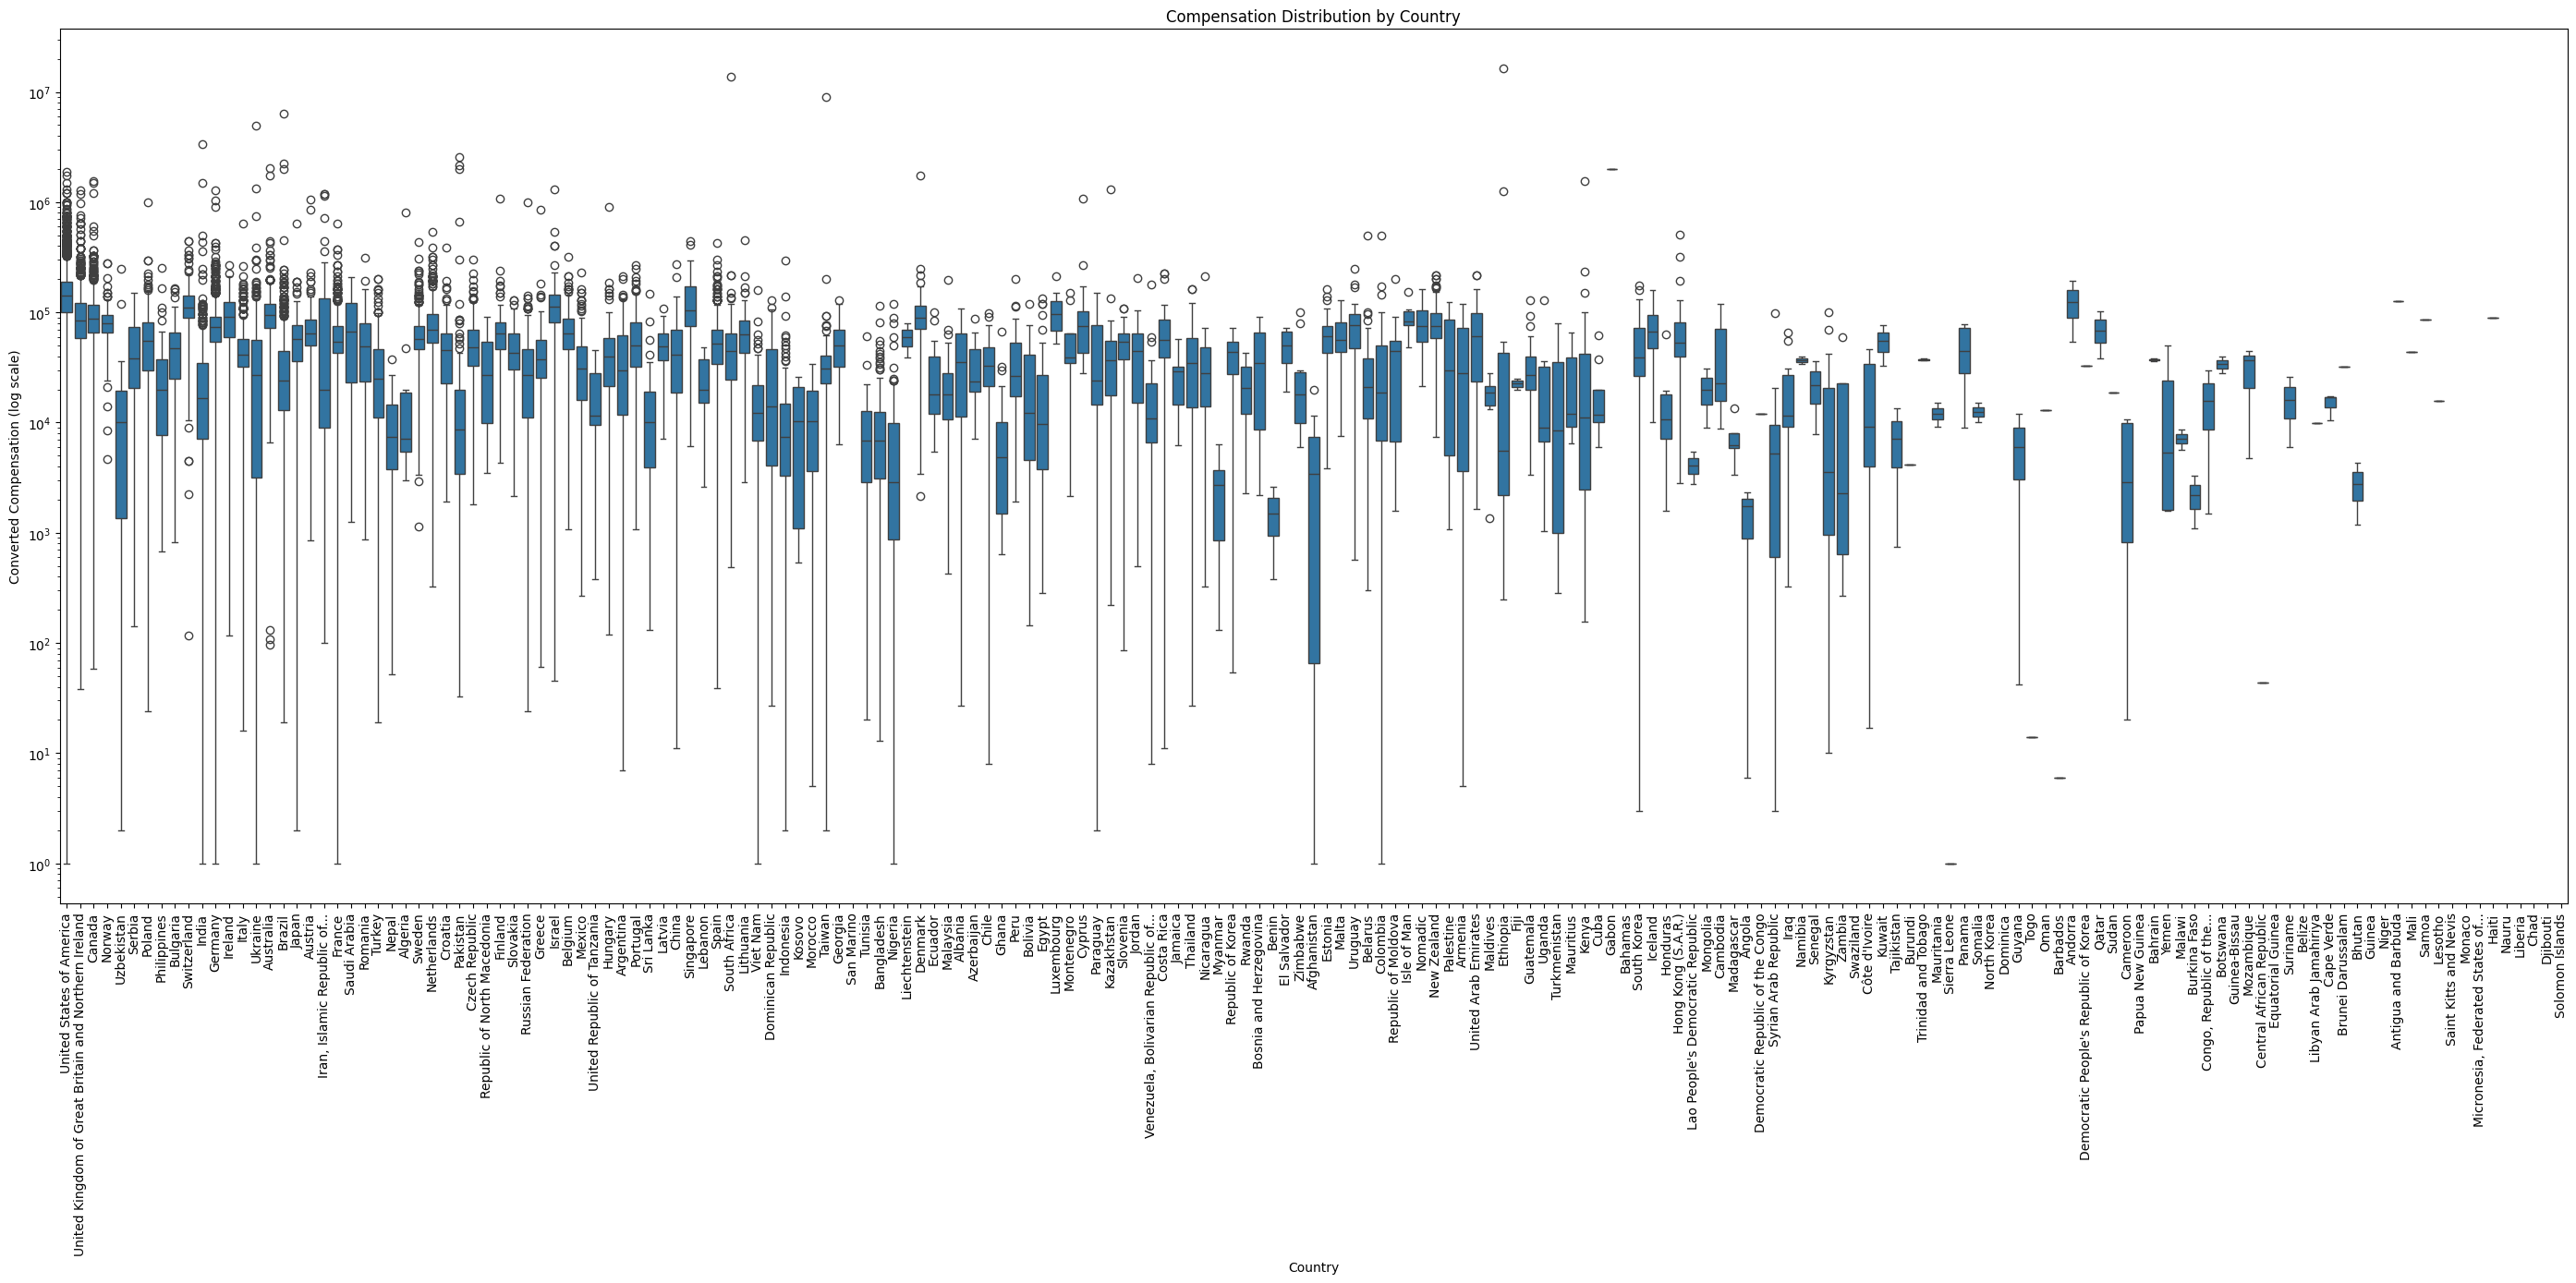

In [66]:
plt.figure(figsize=(28, 14))
sns.boxplot(data=df, x='Country', y='ConvertedCompYearly',native_scale=True)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.yscale('log') 
plt.ylabel('Converted Compensation (log scale)')
plt.title('Compensation Distribution by Country')
plt.tight_layout()
plt.show()

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [67]:
# Remove negative compensation values (as in the previous step)
df = df[df['ConvertedCompYearly'] >= 0]

# Calculate quartiles and IQR
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

# Count outliers
num_outliers = len(outliers)
print(f"Number of outliers: {num_outliers}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# DataFrame *excluding* outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Validate the size of the new DataFrame
print(f"Original DataFrame size: {len(df)}")
print(f"DataFrame size after removing outliers: {len(df_no_outliers)}")

Number of outliers: 978
Lower Bound: -80177.25
Upper Bound: 220860.75
Original DataFrame size: 23435
DataFrame size after removing outliers: 22457


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


In [ ]:
# Select the columns for correlation analysis
correlation_cols = ['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']

# Drop rows with NaN values in selected columns to avoid errors in correlation calculation
df_corr = df[correlation_cols].dropna()

# Calculate the correlation matrix
correlation_matrix = df_corr.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of ConvertedCompYearly, WorkExp, and JobSatPoints_1')
plt.show()

print(correlation_matrix)

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


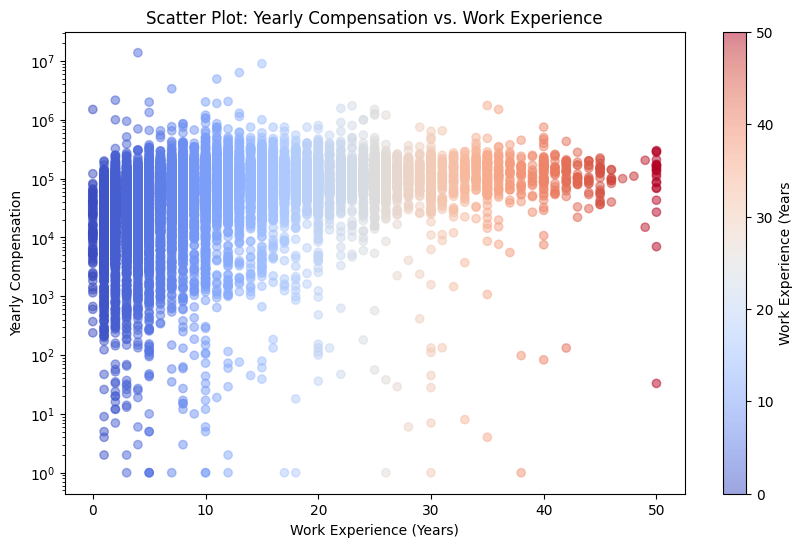

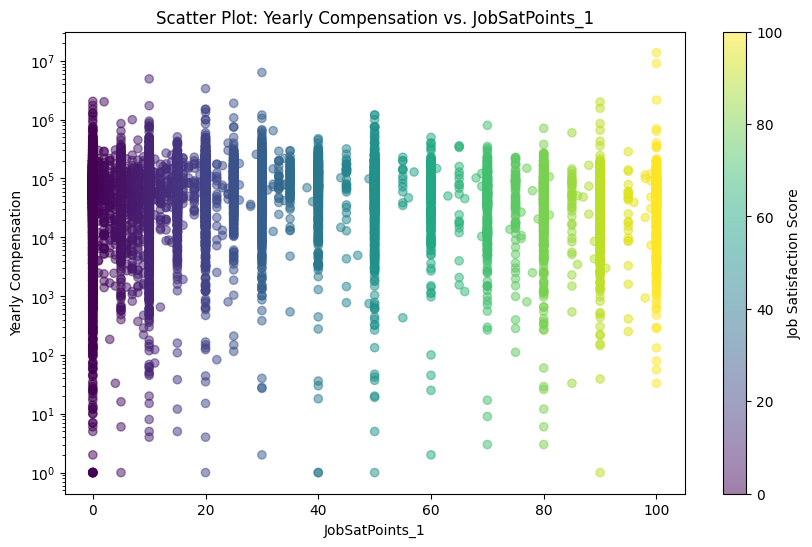

In [80]:
# Scatter plot: ConvertedCompYearly vs. WorkExp
plt.figure(figsize=(10, 6))
plt.scatter(df['WorkExp'], df['ConvertedCompYearly'],
            c=df['WorkExp'],
            cmap='coolwarm',
            alpha=0.5)  # alpha for transparency
plt.title('Scatter Plot: Yearly Compensation vs. Work Experience')
plt.colorbar(label='Work Experience (Years')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Yearly Compensation')
plt.yscale('log') # Use log scale for better visualization
plt.show()

# Scatter plot: ConvertedCompYearly vs. JobSatPoints_1
plt.figure(figsize=(10, 6))
plt.scatter(df['JobSatPoints_1'], df['ConvertedCompYearly'],
            c=df['JobSatPoints_1'],           # color by satisfaction
            #s=df['ConvertedCompYearly'] / 1000,  # scale size by compensation
            alpha=0.5, cmap='viridis')  # alpha for transparency, different color
plt.title('Scatter Plot: Yearly Compensation vs. JobSatPoints_1')
plt.colorbar(label='Job Satisfaction Score',)
plt.xlabel('JobSatPoints_1')
plt.ylabel('Yearly Compensation')
plt.yscale('log') # Use log scale for better visualization
plt.show()

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
